# Processamento dos dados de Mare - Paranaguá
- Douglas Nemes
- Filtro passa baixa com frequencia de corte de 40 horas (obter a mare meteorologica)
- Mare astronomica = mare bruta - mare meteorológica

In [99]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import mlab
from scipy import signal

In [100]:
def make_filter(data, cutoff, fs, btype='high', order=5):
    """
    """
    nyq = 0.5 * fs
    normal_cutoff = np.array(cutoff) / nyq
    b, a = signal.butter(order, normal_cutoff, btype=btype, analog=False)
    y = signal.filtfilt(b, a, data)
    return y

In [101]:
pathname = os.environ['HOME'] + '/Documents/paranagua/'
filename = 'Paranagua_BL22_20200318_1927_data.txt'

df = pd.read_table(pathname + filename, sep=',', parse_dates=True, index_col='Time')

# frequencia de amostragem (5 min) em horas
fs = 1.0 / (5.0 / 60 / 24)

# tamanho do segmento para o calculo do espectro
nfft = int(len(df) / 6)

# serie de profundidade (mare bruta)
y = df.Depth.values

# aplica filtro na serie de pressao

# filtro passa baixa (obtem mare meteorológica)
y1 = make_filter(data=y, cutoff=1./1.66, fs=fs, btype='low', order=5)

# filtro passa alta (pega variacoes menores que 3 h)
# nao esta sendo utilizado, pois parece ser oscilações de fenomenos locais (componentes de agua rasa..??)
# y2 = make_filter(data=y, cutoff=(1./1.66, 1./0.125), fs=fs, btype='bandpass', order=5)
y2 = make_filter(data=y, cutoff=1./0.125, fs=fs, btype='high', order=5)    

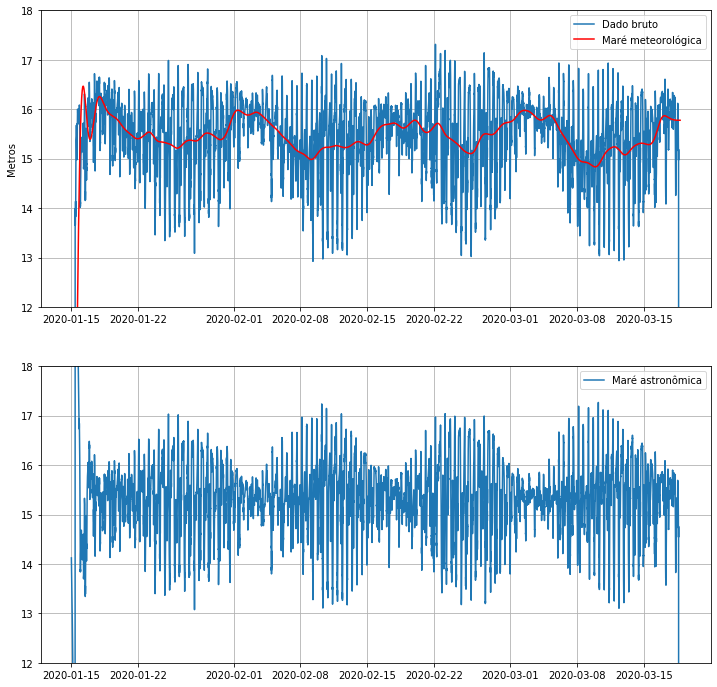

In [102]:
# plotagem da mare bruta, meteorologica e astronomica

%matplotlib inline

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)
ax1.plot(df.index, y, label='Dado bruto')
ax1.plot(df.index, y1, 'r', label='Maré meteorológica')
ax1.legend()
ax1.set_ylabel('Metros')
ax1.grid()
ax1.set_ylim(12, 18)
ax2 = fig.add_subplot(212)
ax2.plot(df.index, y-y1 + np.mean(y), label='Maré astronômica')
ax2.set_ylim(12, 18)
ax2.grid()
ax2.legend()

Text(0, 0.5, 'Metros')

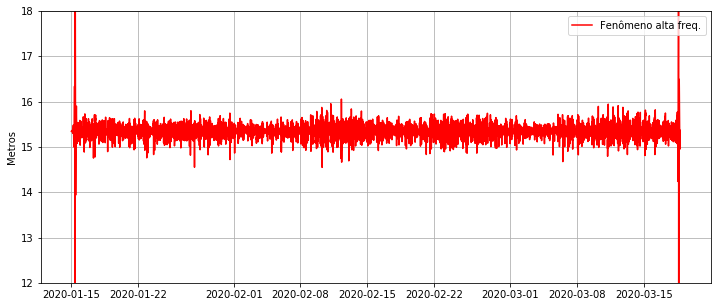

In [103]:
# filtro passa banda (observação da baixa e alta frequencia)
# - fenomenos locais da baia
%matplotlib inline
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(111)
ax1.plot(df.index, y2 + np.mean(y), 'r', label='Fenômeno alta freq.')
ax1.legend(loc=1)
ax1.set_ylim(12, 18)
ax1.grid()
ax1.set_ylabel('Metros')

In [104]:
# calculo do espectro

# espectro mare bruta
sy, f = mlab.psd(x=y, NFFT=int(nfft), Fs=fs, detrend=mlab.detrend_mean,
              window=mlab.window_hanning, noverlap=nfft/2)

# espectro mare astronomica
sy1, f = mlab.psd(x=y-y1, NFFT=int(nfft), Fs=fs, detrend=mlab.detrend_mean,
              window=mlab.window_hanning, noverlap=nfft/2)

# espectro da alta frequencia
# espectro mare astronomica
sy2, f = mlab.psd(x=y2, NFFT=int(nfft), Fs=fs, detrend=mlab.detrend_mean,
              window=mlab.window_hanning, noverlap=nfft/2)

Text(0.5, 0, 'Ciclos por dia')

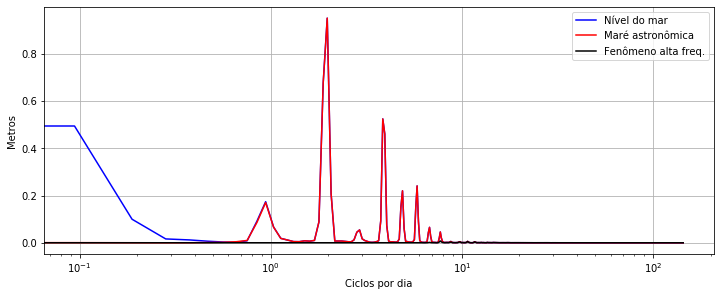

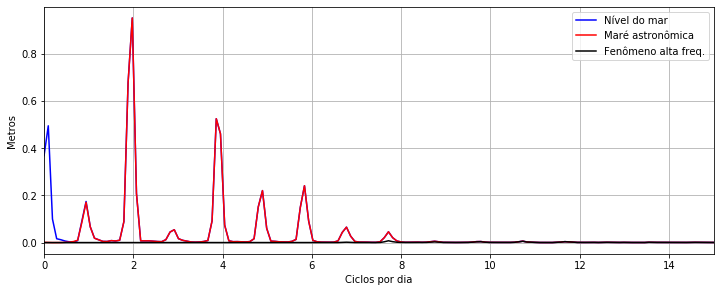

In [105]:
# fenomenos de alta frequencia (ate ~ 2h)

fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(211)
ax1.semilogx(f, sy, 'b', label='Nível do mar')
ax1.semilogx(f, sy1, 'r', label='Maré astronômica')
ax1.semilogx(f, sy2, 'k', label='Fenômeno alta freq.')
ax1.legend()
ax1.set_ylabel('Metros')
ax1.grid()
ax1.set_xlabel('Ciclos por dia')

fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(211)
ax1.plot(f, sy, 'b', label='Nível do mar')
ax1.plot(f, sy1, 'r', label='Maré astronômica')
ax1.plot(f, sy2, 'k', label='Fenômeno alta freq.')
ax1.legend()
ax1.set_ylabel('Metros')
ax1.grid()
ax1.set_xlim(0,15)
ax1.set_xlabel('Ciclos por dia')